Preprocessing Images - Can Convert into .py file later

In [1]:
# RUN THIS ONCE
pip install pynrrd
pip install opencv-python
pip install SimpleITK

SyntaxError: invalid syntax (2001952791.py, line 2)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import SimpleITK as sitk

In [3]:
# Load all the data from the HaN-Seg dataset
# below lists follow indexing: list[case_num-1][0] for data, list[case_num-1][1] for metadata

def openFiles():
    nrrd_ct_data = [] #1024x1024 images with varying depth
    nrrd_mri_data = [] #512x512 images with varying depth
    nrrd_segment_data = [] #1024x1024 images with varying depth

    for i in range(1, 43):
        case_num = f"{i:02d}"
        filepath = f"../HaN-Seg/set_1/case_{case_num}/case_{case_num}_IMG_CT.nrrd"
        data = sitk.ReadImage(filepath, sitk.sitkFloat32)
        nrrd_ct_data.append(data)

    for i in range (1, 43):
        case_num = f"{i:02d}"
        filepath = f"../HaN-Seg/set_1/case_{case_num}/case_{case_num}_IMG_MR_T1.nrrd"
        data = sitk.ReadImage(filepath, sitk.sitkFloat32)
        nrrd_mri_data.append(data)


    for i in range (1, 43):
        case_num = f"{i:02d}"
        filepath = f"../HaN-Seg/set_1/case_{case_num}/case_{case_num}_OAR_Bone_Mandible.seg.nrrd"
        data = sitk.ReadImage(filepath, sitk.sitkFloat32)
        nrrd_segment_data.append(data)
    return nrrd_ct_data, nrrd_mri_data, nrrd_segment_data

In [4]:
nrrd_ct_data, nrrd_mri_data, nrrd_segment_data = openFiles()

42
<class 'SimpleITK.SimpleITK.Image'>
(1024, 1024, 202)
(0.5576171875, 0.5576171875, 2.0)
42
(512, 512, 83)
(0.7031000256538391, 0.7031000256538391, 3.000002384185791)


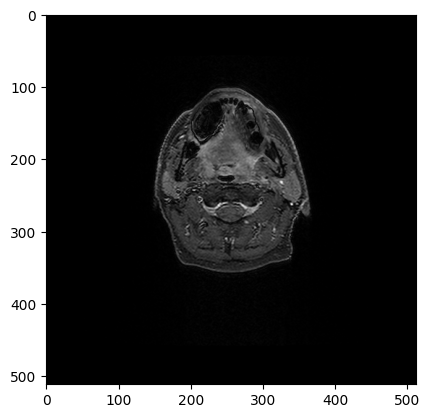

In [5]:
print(len(nrrd_ct_data))
print(type(nrrd_ct_data[0]))
ct_arr = sitk.GetArrayFromImage(nrrd_ct_data[0])
plt.imshow(ct_arr[105, :, :], cmap='gray')
print(nrrd_ct_data[0].GetSize())
print(nrrd_ct_data[0].GetSpacing())

print(len(nrrd_mri_data))
mri_arr = sitk.GetArrayFromImage(nrrd_mri_data[0])
mri = nrrd_mri_data[0]
plt.imshow(mri_arr[53, :, :], cmap='gray')
print(nrrd_mri_data[0].GetSize())
print(nrrd_mri_data[0].GetSpacing())

ALL CODE BELOW IS FROM THE SIMPLEITK TUTORIAL
https://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/60_Registration_Introduction.html

In [6]:
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed
from IPython.display import clear_output


# Callback invoked by the IPython interact method for scrolling through image stacks of
# the two images being registered.
def display_images(fixed_image_z, moving_image_z, fixed_npa, moving_npa):
    # Create a figure with two subplots and the specified size.
    plt.subplots(1, 2, figsize=(10, 8))

    # Draw the fixed image in the first subplot.
    plt.subplot(1, 2, 1)
    plt.imshow(fixed_npa[fixed_image_z, :, :], cmap=plt.cm.Greys_r)
    plt.title("fixed image")
    plt.axis("off")

    # Draw the moving image in the second subplot.
    plt.subplot(1, 2, 2)
    plt.imshow(moving_npa[moving_image_z, :, :], cmap=plt.cm.Greys_r)
    plt.title("moving image")
    plt.axis("off")

    plt.show()


# Callback invoked by the IPython interact method for scrolling and modifying the alpha blending
# of an image stack of two images that occupy the same physical space.
def display_images_with_alpha(image_z, alpha, fixed, moving):
    img = (1.0 - alpha) * fixed[:, :, image_z] + alpha * moving[:, :, image_z]
    plt.imshow(sitk.GetArrayViewFromImage(img), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.show()


# Callback invoked when the StartEvent happens, sets up our new data.
def start_plot():
    global metric_values, multires_iterations

    metric_values = []
    multires_iterations = []


# Callback invoked when the EndEvent happens, do cleanup of data and figure.
def end_plot():
    global metric_values, multires_iterations

    del metric_values
    del multires_iterations
    # Close figure, we don't want to get a duplicate of the plot latter on.
    plt.close()


# Callback invoked when the IterationEvent happens, update our data and display new figure.
def plot_values(registration_method):
    global metric_values, multires_iterations

    metric_values.append(registration_method.GetMetricValue())
    # Clear the output area (wait=True, to reduce flickering), and plot current data
    clear_output(wait=True)
    # Plot the similarity metric values
    plt.plot(metric_values, "r")
    plt.plot(
        multires_iterations,
        [metric_values[index] for index in multires_iterations],
        "b*",
    )
    plt.xlabel("Iteration Number", fontsize=12)
    plt.ylabel("Metric Value", fontsize=12)
    plt.show()


# Callback invoked when the sitkMultiResolutionIterationEvent happens, update the index into the
# metric_values list.
def update_multires_iterations():
    global metric_values, multires_iterations
    multires_iterations.append(len(metric_values))

In [7]:
print(f"Initial translation: {initial_transform.GetTranslation()}")
print(f"Are these images from the same patient/session? Do they roughly cover the same anatomy?")

# Check if images even overlap in physical space
print(f"\nFixed image physical bounds:")
print(f"  Origin: {fixed_image.GetOrigin()}")
print(f"  Max: {[o + s*sz for o,s,sz in zip(fixed_image.GetOrigin(), fixed_image.GetSpacing(), fixed_image.GetSize())]}")

print(f"\nMoving image physical bounds:")
print(f"  Origin: {moving_image.GetOrigin()}")
print(f"  Max: {[o + s*sz for o,s,sz in zip(moving_image.GetOrigin(), moving_image.GetSpacing(), moving_image.GetSize())]}")

NameError: name 'initial_transform' is not defined

In [8]:
# Registration Testing
ct = nrrd_ct_data[0]
mri = nrrd_mri_data[0]

fixed_image = ct
moving_image = mri

initial_transform = sitk.CenteredTransformInitializer(
    fixed_image,
    moving_image,
    sitk.Euler3DTransform(),
    sitk.CenteredTransformInitializerFilter.GEOMETRY,
)

min_value = float(sitk.GetArrayViewFromImage(moving_image).min())
moving_resampled = sitk.Resample(
    moving_image,
    fixed_image,
    initial_transform,
    sitk.sitkLinear,
    min_value,
    moving_image.GetPixelID(),
)

interact(
    display_images_with_alpha,
    image_z=(0, fixed_image.GetSize()[2] - 1),
    alpha=(0.0, 1.0, 0.05),
    fixed=fixed(fixed_image),
    moving=fixed(moving_resampled),
);


interactive(children=(IntSlider(value=100, description='image_z', max=201), FloatSlider(value=0.5, description…

In [9]:


registration_method = sitk.ImageRegistrationMethod()

# Similarity metric settings.
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

# Optimizer settings.
registration_method.SetOptimizerAsGradientDescent(
    learningRate=1.0,
    numberOfIterations=100,
    convergenceMinimumValue=1e-6,
    convergenceWindowSize=10,
)
registration_method.SetOptimizerScalesFromPhysicalShift()

# Setup for the multi-resolution framework.
registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[4, 2, 1])
registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2, 1, 0])
registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

# Don't optimize in-place, we would possibly like to run this cell multiple times.
registration_method.SetInitialTransform(initial_transform, inPlace=False)

# # Connect all of the observers so that we can perform plotting during registration.
# registration_method.AddCommand(sitk.sitkStartEvent, start_plot)
# registration_method.AddCommand(sitk.sitkEndEvent, end_plot)
# registration_method.AddCommand(
#     sitk.sitkMultiResolutionIterationEvent, update_multires_iterations
# )
# registration_method.AddCommand(
#     sitk.sitkIterationEvent, lambda: plot_values(registration_method)
# )

final_transform = registration_method.Execute(
    sitk.Cast(fixed_image, sitk.sitkFloat32), sitk.Cast(moving_image, sitk.sitkFloat32)
)

In [10]:
print(f"Final metric value: {registration_method.GetMetricValue()}")
print(
    f"Optimizer's stopping condition, {registration_method.GetOptimizerStopConditionDescription()}"
)

moving_resampled = sitk.Resample(
    moving_image,
    fixed_image,
    final_transform,
    sitk.sitkLinear,
    min_value,
    moving_image.GetPixelID(),
)

interact(
    display_images_with_alpha,
    image_z=(0, fixed_image.GetSize()[2] - 1),
    alpha=(0.0, 1.0, 0.05),
    fixed=fixed(fixed_image),
    moving=fixed(moving_resampled),
);

Final metric value: -0.4435871636840696
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 27.


interactive(children=(IntSlider(value=100, description='image_z', max=201), FloatSlider(value=0.5, description…

From lab b pt 4

In [ ]:
ct = nrrd_ct_data[0]
mri = nrrd_mri_data[0]

img_mri = ct
moving_img = mri
min_value = float(sitk.GetArrayViewFromImage(moving_img).min())

init_tx = sitk.CenteredTransformInitializer(
    img_mri, moving_img,
    sitk.Euler3DTransform(),
    sitk.CenteredTransformInitializerFilter.GEOMETRY
)

# ---- Configure registration (Mattes MI + multi-resolution) ----
R = sitk.ImageRegistrationMethod()
R.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
R.SetMetricSamplingStrategy(R.RANDOM)
R.SetMetricSamplingPercentage(0.01)
R.SetInterpolator(sitk.sitkLinear)

R.SetOptimizerAsRegularStepGradientDescent(
    learningRate=1.0, minStep=1e-4, numberOfIterations=500, relaxationFactor=0.5
)
R.SetOptimizerScalesFromPhysicalShift()

R.SetShrinkFactorsPerLevel([4, 2, 1])
R.SetSmoothingSigmasPerLevel([2.0, 1.0, 0.0])
R.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

R.SetInitialTransform(init_tx, inPlace=False)

final_tx = R.Execute(img_mri, moving_img)

ct_rigid = sitk.Resample(
    moving_img,  # CT (moving)
    img_mri,     # MRI (fixed)
    final_tx,
    sitk.sitkLinear, min_value,
    moving_img.GetPixelIDValue()
)


In [ ]:
interact(
    display_images_with_alpha,
    image_z=(0, img_mri.GetSize()[2] - 1),
    alpha=(0.0, 1.0, 0.05),
    fixed=fixed(img_mri),
    moving=fixed(ct_rigid),
);

interactive(children=(IntSlider(value=100, description='image_z', max=201), FloatSlider(value=0.5, description…

Testing U-net CNN pipeline

DO TRAIN_TEST_SPLIT HERE:
    - FOR EACH TRAINING POINT, INCREMENTALLY CALCULATE MEAN AND SD
    - USE A 2ND PASS TO NORMALIZE THE IMAGES

[[32768. 32768. 32768. ... 32768. 32768. 32768.]
 [32768. 32768. 32768. ... 32768. 32768. 32768.]
 [32768. 32768. 32768. ... 32768. 32768. 32768.]
 ...
 [32768. 32768. 32768. ... 32768. 32768. 32768.]
 [32768. 32768. 32768. ... 32768. 32768. 32768.]
 [32768. 32768. 32768. ... 32768. 32768. 32768.]]
False
[[-0.10978535 -0.10978535 -0.10978535 ... -0.10978535 -0.10978535
  -0.10978535]
 [-0.10978535 -0.10978535 -0.10978535 ... -0.10978535 -0.10978535
  -0.10978535]
 [-0.10978535 -0.10978535 -0.10978535 ... -0.10978535 -0.10978535
  -0.10978535]
 ...
 [-0.10978535 -0.10978535 -0.10978535 ... -0.10978535 -0.10978535
  -0.10978535]
 [-0.10978535 -0.10978535 -0.10978535 ... -0.10978535 -0.10978535
  -0.10978535]
 [-0.10978535 -0.10978535 -0.10978535 ... -0.10978535 -0.10978535
  -0.10978535]]


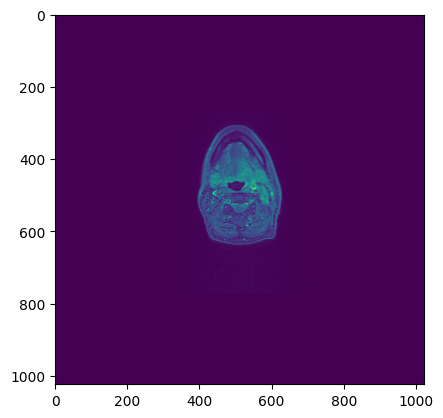

In [11]:
# Normalize image

mri_image_reg = sitk.GetArrayViewFromImage(moving_resampled).astype(np.float32)
ground_truth = sitk.GetArrayFromImage(nrrd_segment_data[0]).astype(np.float32)

i = 100
plt.imshow(mri_image_reg[i])
print(mri_image_reg[i])

img_sum = 0.0
img_sq_sum = 0.0
total = 0

img_sum += np.sum(mri_image_reg)
img_sq_sum += np.sum(mri_image_reg ** 2)
total += mri_image_reg.size

train_mean = img_sum/total

# Leverage fact that Var(X) = E(X^2) - E(X)^2 where E(X) is the mean
train_sd = np.sqrt(img_sq_sum/total - (train_mean**2))

mri_image_reg = (mri_image_reg - train_mean) / train_sd

# save to a new file & list = mri_reg_list
plt.imshow(mri_image_reg[i])
print(np.var(mri_image_reg[i])< 1e-14)
print(mri_image_reg[i])

In [12]:
# Extract Slices
# for img, seg_mask in nmri_reg_list, nrrd_segment_data
slices = []
slices_gt = []

# Need for loop for a list of volumes
slice_var = np.var(mri_image_reg, axis = (1, 2))
mask = slice_var > 1e-10
slices = mri_image_reg[mask]
slices_gt = ground_truth[mask]

### Preparing Data for Training/Testing

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

BATCH_SIZE = 4
BUFFER_SIZE = 1000
RANDOM_SEED = 42
IMAGE_RESIZE = 256

In [ ]:
from sklearn.model_selection import train_test_split

slice_arr = np.array(slices)
slices_gt_arr = np.array(slices_gt)
print(np.shape(slice_arr))

slices_resize = np.expand_dims(slice_arr, axis=-1)
slices_gt_resize = np.expand_dims(slices_gt_arr, axis=-1)

slices_resize = tf.image.resize(slices_resize, (IMAGE_RESIZE, IMAGE_RESIZE)).numpy()
slices_gt_resize = tf.image.resize(slices_gt_resize, (IMAGE_RESIZE, IMAGE_RESIZE)).numpy()

X_train, X_test, y_train, y_test = train_test_split(slices_resize, slices_gt_resize, test_size=0.2, random_state=RANDOM_SEED)

# X_train = np.expand_dims(X_train, axis=-1)
# y_train = np.expand_dims(y_train, axis=-1)

# X_test = np.expand_dims(X_test, axis=-1)
# y_test = np.expand_dims(y_test, axis=-1)


train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE)

print(np.shape(X_train))

(125, 1024, 1024)
(100, 256, 256, 1)


In [21]:
mri_datagen = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True, zoom_range=0.2)
mask_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

image_generator = mri_datagen.flow(
    X_train,
    batch_size=BATCH_SIZE,
    seed = RANDOM_SEED
)

mask_generator = mask_datagen.flow(
    y_train,
    batch_size=BATCH_SIZE,
    seed = RANDOM_SEED
)

train_generator = zip(image_generator, mask_generator)

test_image_generator = test_datagen.flow(
    X_test,
    batch_size=BATCH_SIZE,
    shuffle = False,
    seed = RANDOM_SEED
)

test_mask_generator = mask_datagen.flow(
    y_test,
    batch_size=BATCH_SIZE,
    shuffle = False,
    seed = RANDOM_SEED
)

test_generator = zip(test_image_generator, test_mask_generator)

### U-Net CNN Model
Sources:

https://www.geeksforgeeks.org/machine-learning/u-net-architecture-explained/

https://medium.com/@alejandro.itoaramendia/decoding-the-u-net-a-complete-guide-810b1c6d56d8

https://www.digitalocean.com/community/tutorials/unet-architecture-image-segmentation

In [22]:
## A single Encoding step in the Contracting path of a U-Net CNN
## @Inputs:
##       inputs: image of size (nxn) with k feature channels
##       num_channels: number of channels to have in output image (i.e. depth of output tensor)
## @Outputs: 
##       x: image of size (n/2 x n/2) with num_channels feature channels
def encode_block(inputs, num_channels):
    # Extract num_channels feature channels from image
    x = tf.keras.layers.Conv2D(num_channels, 3, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(num_channels, 3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    skip = tf.keras.layers.Activation('relu')(x)

    # Downsample each channels feature map by a factor of 2
    x = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2)(skip)

    return skip, x

## A single Decoding step in the Expanding path of a U-Net CNN
## @Inputs:
##       inputs: image of size (nxn) with k feature channels
##       skip_connection: tensor of corresponding encoding block
##       num_channels: number of channels to have in output image (i.e. depth of output tensor)
## @Outputs: 
##       x: image of size (2nx2n) with num_channels feature channels
def decode_block(inputs, skip_connection, num_channels):
    # Upsample image by doubling feature space while changing feature channels to num_channels
    x = tf.keras.layers.Conv2DTranspose(num_channels, (2,2), strides=2, padding='same')(inputs)

    # Concatonate the skip_channel and the upsampled image (doubles the feature channels)
    # Might need to resize skip_connection, but should be fine b/c same padding in encoding
    x = tf.keras.layers.Concatenate()([x, skip_connection])
    
    # Merge feature channels from the skip_connection and upsampled input image
    x = tf.keras.layers.Conv2D(num_channels, 3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(num_channels, 3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    return x

In [23]:
# Metrics
def dice_coeff(y_true, y_pred):
    #TODO
    return

def rand_index(y_true, y_pred):
    #TODO
    return

def jaccard_index(y_true, y_pred):
    #TODO
    return

def specificity(y_true, y_pred):
    y_pred = tf.round(y_pred)
    true_negatives = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred), tf.float32))
    possible_negatives = tf.reduce_sum(tf.cast(1 - y_true, tf.float32))
    return true_negatives / (possible_negatives + tf.keras.backend.epsilon())

In [ ]:
## Defining the model

input = tf.keras.layers.Input(shape=(IMAGE_RESIZE, IMAGE_RESIZE, 1))

# Do 5 calls of encode_block to end up with a 32x32x512 tensor
s1, e1 = encode_block(input, 32)
s2, e2 = encode_block(e1, 64)
s3, e3 = encode_block(e2, 128)
s4, e4 = encode_block(e3, 256)
s5, e5 = encode_block(e4, 512)

# Bottleneck
b1 = tf.keras.layers.Conv2D(1024, 3, padding='same')(e5)
b1 = tf.keras.layers.Activation('relu')(b1)
b1 = tf.keras.layers.Conv2D(1024, 3, padding='same')(b1)
b1 = tf.keras.layers.Activation('relu')(b1)

# Do 5 calls of decode_block
d1 = decode_block(b1, s5, 512)
d2 = decode_block(d1, s4, 256)
d3 = decode_block(d2, s3, 128)
d4 = decode_block(d3, s2, 64)
d5 = decode_block(d4, s1, 32)

# Play around with activation
output = tf.keras.layers.Conv2D(1, 1, padding='same', activation='sigmoid')(d5)

model = tf.keras.models.Model(inputs=input, outputs=output, name='U-Net')

model.compile(
    optimizer = 'adam',
    loss= 'binary_crossentropy',
    metrics=['accuracy', specificity]
)

# model.compile(
#     optimizer = 'adam',
#     loss= 'categorical_crossentropy',
#     metrics=['accuracy', dice_coeff, specificity, rand_index, jaccard_index]
# )

#TODO Finish this

In [27]:
import tensorflow as tf

# List all physical GPUs
gpus = tf.config.list_physical_devices('GPU')
print("GPUs available:", gpus)

# Check if TensorFlow is using GPU
print("GPU device used by TensorFlow:", tf.test.gpu_device_name())

# Optional: Check if TensorFlow sees GPU and memory info
for gpu in gpus:
    details = tf.config.experimental.get_device_details(gpu)
    print(details)


GPUs available: []
GPU device used by TensorFlow: 


In [30]:
EPOCH = 4
model.fit(
    train_dataset, 
    validation_data=test_dataset,
    epochs = EPOCH
    )

Epoch 1/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 619ms/step - accuracy: 0.9867 - loss: 0.2503 - specificity: 0.9877 - val_accuracy: 0.9989 - val_loss: 0.2693 - val_specificity: 1.0000
Epoch 2/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 581ms/step - accuracy: 0.9988 - loss: 0.1000 - specificity: 0.9999 - val_accuracy: 0.9989 - val_loss: 0.2436 - val_specificity: 1.0000
Epoch 3/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 582ms/step - accuracy: 0.9989 - loss: 0.0635 - specificity: 1.0000 - val_accuracy: 0.9989 - val_loss: 0.0673 - val_specificity: 1.0000
Epoch 4/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 574ms/step - accuracy: 0.9989 - loss: 0.0476 - specificity: 1.0000 - val_accuracy: 0.9989 - val_loss: 0.0672 - val_specificity: 1.0000
